In [1]:
##Importing libraries needed throughout code along with importing various data sources. 
##DSCI 5260, Spencer Parlow and Travis Messerschmitt
import importlib
import os
import json
import matplotlib.pyplot as plt
from IPython.display import display
import os
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import statsmodels.tsa.arima.model
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
CH_data = pd.read_excel ('Project_Raw_Data_France _ Switzerland.xlsx')
FR_data = pd.read_excel ('France_scatter.xlsx')
CH_breakdown = pd.read_csv(r'C:\Users\sparl\OneDrive - Ace Hardware CORP\Desktop\Python Project\CH_breakdown.csv')
FR_breakdown = pd.read_csv(r'C:\Users\sparl\OneDrive - Ace Hardware CORP\Desktop\Python Project\FR_breakdown.csv')

In [2]:
#breakdown of aggregate data for France by year
FR_breakdown.describe()

,France Commissioned by Year,Bioenergy,Hydro,Solar,Wind
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2011.000000,39.000000,82.466667,2449.400000,70.000000
std,4.472136,23.880656,87.429863,1572.533025,57.893992
min,2004.000000,7.000000,10.000000,384.000000,0.000000
25%,2007.500000,19.500000,46.000000,1397.500000,6.500000
50%,2011.000000,45.000000,57.000000,2189.000000,82.000000
75%,2014.500000,51.000000,75.000000,3635.000000,115.500000
max,2018.000000,96.000000,319.000000,5263.000000,155.000000


In [3]:
#breakdown of aggregatge data for Switzerland by year
CH_breakdown.describe()

,Switzerland Commissioned by Year,Bioenergy,Hydro,Solar,Wind
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2011.000000,17.600000,38.333333,789.400000,2.533333
std,4.472136,12.339252,20.906823,921.302246,3.602909
min,2004.000000,1.000000,0.000000,0.000000,0.000000
25%,2007.500000,10.000000,29.500000,117.500000,0.000000
50%,2011.000000,20.000000,43.000000,372.000000,1.000000
75%,2014.500000,26.000000,53.000000,1321.000000,3.500000
max,2018.000000,39.000000,64.000000,3336.000000,12.000000


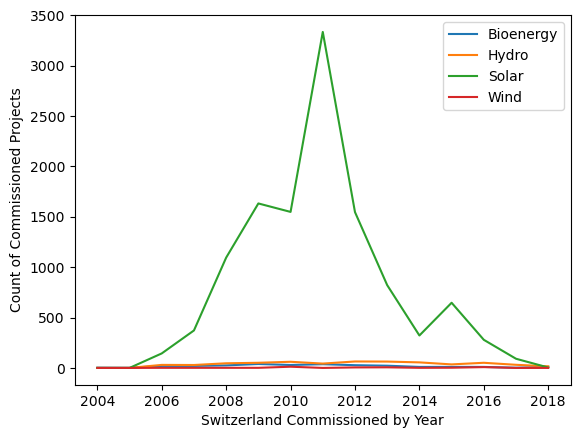

In [4]:
#time series of renewable energy capacity by type for Switzerland
df=CH_breakdown.set_index('Switzerland Commissioned by Year')
df.plot()
plt.ylabel("Count of Commissioned Projects")
plt.show()

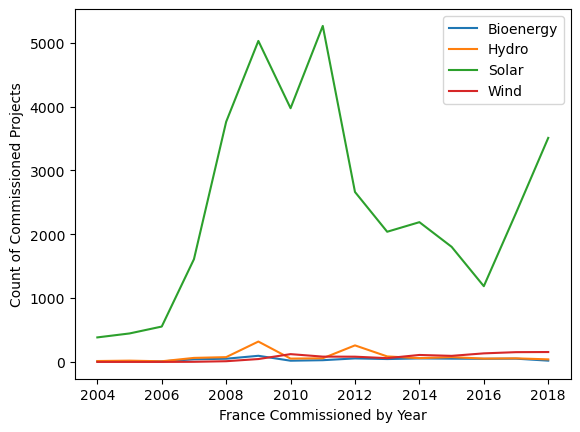

In [5]:
#time series of renewable energy capacity by type for France
df=FR_breakdown.set_index('France Commissioned by Year')
df.plot()
plt.ylabel("Count of Commissioned Projects")
plt.show()

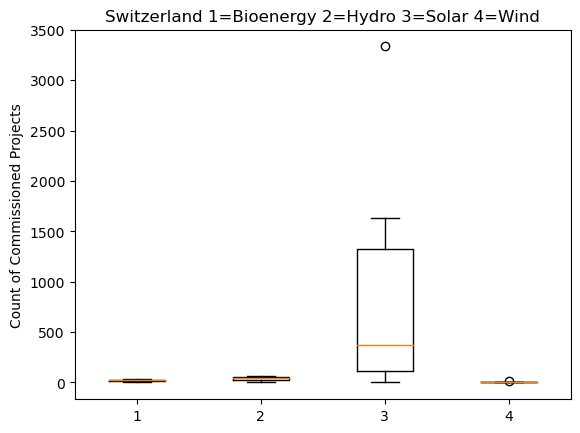

In [6]:
#Box plot for capacity by type for Switzerland
df=CH_breakdown.set_index('Switzerland Commissioned by Year')
plt.boxplot(df)
plt.title("Switzerland 1=Bioenergy 2=Hydro 3=Solar 4=Wind")
plt.ylabel("Count of Commissioned Projects")
plt.show()

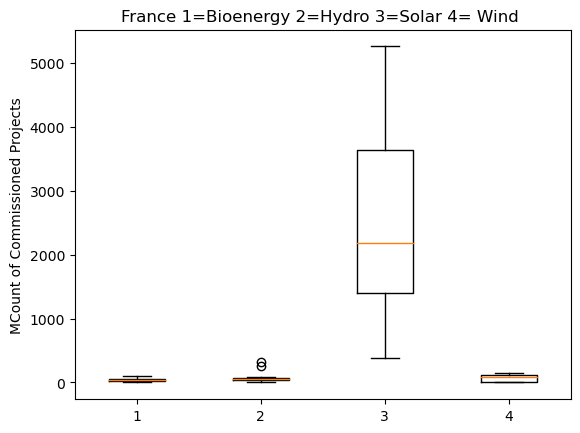

In [7]:
#Box plot for capacity by type for Switzerland
df=FR_breakdown.set_index('France Commissioned by Year')
plt.boxplot(df)
plt.title("France 1=Bioenergy 2=Hydro 3=Solar 4= Wind " )
plt.ylabel("MCount of Commissioned Projects")
plt.show()

In [8]:
##Display first 4 observations and header for Switzerland data with capacity, commissioning_date, longitude and latitude of power location
##renewable source type
print(CH_data.head())

   Unique ID  electrical_capacity commissioning_date  \
0  CH-000002                0.755         2004-07-01   
1  CH-000003                0.080         2004-11-24   
2  CH-000004                0.260         2005-10-04   
3  CH-000005                0.450         2006-01-01   
4  CH-000006                0.480         2006-01-01   

  Concatenation Commision Date and Capacity     lon      lat  \
0                          01/07/2004,0.755  9.0353  47.5619   
1                           24/11/2004,0.08  9.8393  46.8083   
2                           04/10/2005,0.26  8.2363  47.2278   
3                           01/01/2006,0.45  7.2549  47.1691   
4                           01/01/2006,0.48  7.9084  46.2942   

  energy_source_level_1 energy_source_level_2 energy_source_level_3  
0      Renewable energy             Bioenergy    Biomass and biogas  
1      Renewable energy             Bioenergy    Biomass and biogas  
2      Renewable energy             Bioenergy    Biomass and biogas 

In [9]:
##Display first 4 observations and header for France data with capacity, commissioning_date, longitude and latitude of power location
##renewable source type
print(FR_data.head())

   Unique ID  electrical_capacity commissioning_date  \
0  FR-001052              0.69800         2004-01-01   
1  FR-001053              0.04938         2004-01-01   
2  FR-001054              0.20000         2004-01-03   
3  FR-001055              0.07964         2004-01-04   
4  FR-001056              0.09000         2004-01-04   

  Concatenation Commision Date and Capacity       lon        lat  \
0                          01/01/2004,0.698  4.134765  45.220144   
1                        01/01/2004,0.04938  1.602579  50.665185   
2                            03/01/2004,0.2  6.318621  48.384917   
3                        04/01/2004,0.07964  4.088835  44.125405   
4                           04/01/2004,0.09  6.113201  48.052239   

  energy_source_level_1 energy_source_level_2 energy_source_level_3  
0      Renewable energy                 Solar                   NaN  
1      Renewable energy                 Solar                   NaN  
2      Renewable energy                 Sola

In [10]:
#dispaly the number of variables and observations for Switzerland
CH_data.shape

(12718, 9)

In [11]:
#dispaly the number of variables and observations for France
FR_data.shape

(39616, 9)

In [12]:
#display names and their data types for Switzerland
CH_data.dtypes

Unique ID                                            object
electrical_capacity                                 float64
commissioning_date                           datetime64[ns]
Concatenation Commision Date and Capacity            object
lon                                                 float64
lat                                                 float64
energy_source_level_1                                object
energy_source_level_2                                object
energy_source_level_3                                object
dtype: object

In [13]:
#display names and their data types for France
FR_data.dtypes

Unique ID                                            object
electrical_capacity                                 float64
commissioning_date                           datetime64[ns]
Concatenation Commision Date and Capacity            object
lon                                                 float64
lat                                                 float64
energy_source_level_1                                object
energy_source_level_2                                object
energy_source_level_3                                object
dtype: object

In [14]:
##display missing values for Switzerland
missing_vals = CH_data.isnull().sum()
pd.set_option('display.max_rows', None)
missing_vals = missing_vals[missing_vals>0]
display(missing_vals)

lon                         24
lat                         24
energy_source_level_3    12441
dtype: int64

In [15]:
##display missing values for France
missing_vals = FR_data.isnull().sum()
pd.set_option('display.max_rows', None)
missing_vals = missing_vals[missing_vals>0]
display(missing_vals)

lon                        216
lat                        216
energy_source_level_1    27948
energy_source_level_2    27948
energy_source_level_3    39394
dtype: int64

In [16]:
##describe all data for Switzerland
CH_data.describe(include = 'all')

,Unique ID,electrical_capacity,commissioning_date,Concatenation Commision Date and Capacity,lon,lat,energy_source_level_1,energy_source_level_2,energy_source_level_3
count,12718,12718.000000,12718,12718,12694.000000,12694.000000,12718,12718,277
unique,12718,NaN,NaN,12384,NaN,NaN,1,4,4
top,CH-000002,NaN,NaN,"04/12/2009,0.0099",NaN,NaN,Renewable energy,Solar,Sewage and landfill gas
freq,1,NaN,NaN,6,NaN,NaN,12718,11841,131
mean,NaN,0.095433,2011-07-09 16:25:24.013209600,NaN,8.067222,47.050219,NaN,NaN,NaN
min,NaN,0.000400,2004-07-01 00:00:00,NaN,5.971500,45.828000,NaN,NaN,NaN
25%,NaN,0.005400,2009-11-18 00:00:00,NaN,7.450850,46.794800,NaN,NaN,NaN
50%,NaN,0.010600,2011-09-01 00:00:00,NaN,8.020000,47.134950,NaN,NaN,NaN
75%,NaN,0.047300,2012-08-27 00:00:00,NaN,8.781500,47.373500,NaN,NaN,NaN
max,NaN,24.300000,2018-12-12 00:00:00,NaN,10.446200,47.791900,NaN,NaN,NaN


In [17]:
##describe all data for France
FR_data.describe(include = 'all')

,Unique ID,electrical_capacity,commissioning_date,Concatenation Commision Date and Capacity,lon,lat,energy_source_level_1,energy_source_level_2,energy_source_level_3
count,39616,39616.000000,39616,39616,39400.000000,39400.000000,11668,11668,222
unique,39616,NaN,NaN,34844,NaN,NaN,1,4,4
top,FR-001052,NaN,NaN,"18/12/2017,0.099",NaN,NaN,Renewable energy,Solar,Sewage and landfill gas
freq,1,NaN,NaN,121,NaN,NaN,11668,10926,111
mean,NaN,0.571390,2012-03-28 08:25:04.119547648,NaN,2.279732,46.065132,NaN,NaN,NaN
min,NaN,0.001000,2004-01-01 00:00:00,NaN,-5.085638,42.385685,NaN,NaN,NaN
25%,NaN,0.064000,2009-06-17 00:00:00,NaN,0.057971,44.125791,NaN,NaN,NaN
50%,NaN,0.090000,2011-07-25 00:00:00,NaN,2.357250,45.971104,NaN,NaN,NaN
75%,NaN,0.150000,2014-12-16 00:00:00,NaN,4.501008,47.828837,NaN,NaN,NaN
max,NaN,17.000000,2018-12-28 00:00:00,NaN,8.154304,51.072948,NaN,NaN,NaN


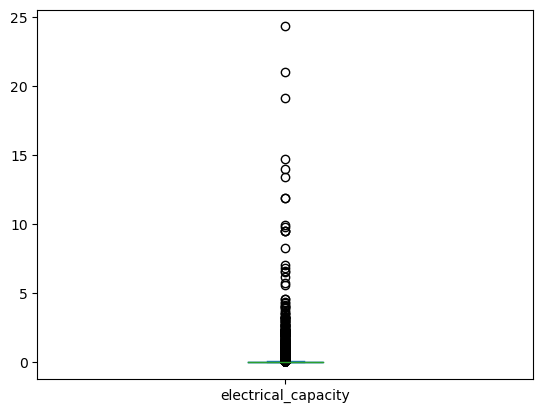

In [18]:
##Box plot for total electrical capacity for Switzerland
CH_data.electrical_capacity.plot(kind='box')
plt.show()

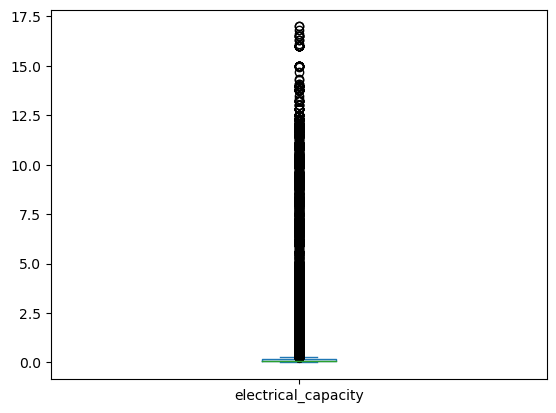

In [19]:
##Box plot for total electrical capacity for France
FR_data.electrical_capacity.plot(kind='box')
plt.show()

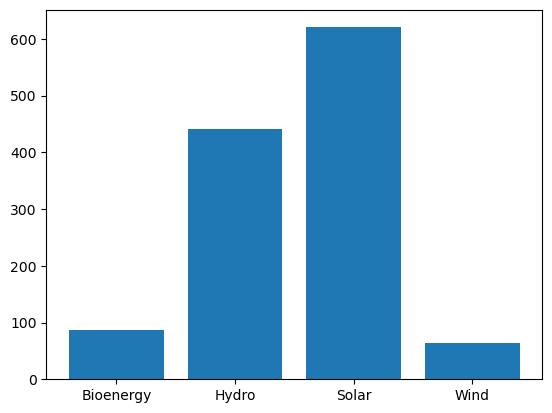

In [20]:
##Energy capacity by source type for Switzerland
summary=CH_data.groupby('energy_source_level_2'). electrical_capacity.sum()
plt.bar(x=summary.index, height=summary.values)
plt.show()

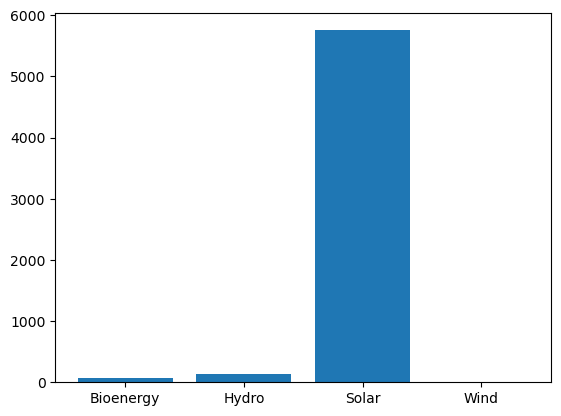

In [21]:
##Energy capacity by source type for France
summary=FR_data.groupby('energy_source_level_2'). electrical_capacity.sum()
plt.bar(x=summary.index, height=summary.values)
plt.show()

In [29]:
sudo yum install -y openssl11 openssl11-devel

SyntaxError: invalid syntax (3747756341.py, line 1)

In [39]:
##bring in weekly time series of France wind capacity from 2014-2018
import pandas as pd
df=pd.read_csv('France_wind.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1592, 1)


,electrical_capacity
Date,
1993-07-25,2.20000
1998-10-23,4.50000
1999-01-09,3.00000
2000-01-10,3.30000
2000-03-15,6.00000
2000-04-13,2.70000
2000-05-29,6.60000
2001-09-25,10.40000
2001-09-26,4.23000


In [30]:
#preview France wind 2014-2018
FR_W_df["Date"] = pd.to_datetime(FR_W_df["Date"])
FR_W_df.head()

,Date,electrical_capacity
0,1993-07-25,2.2
1,1998-10-23,4.5
2,1999-01-09,3.0
3,2000-01-10,3.3
4,2000-03-15,6.0


<Axes: xlabel='Date'>

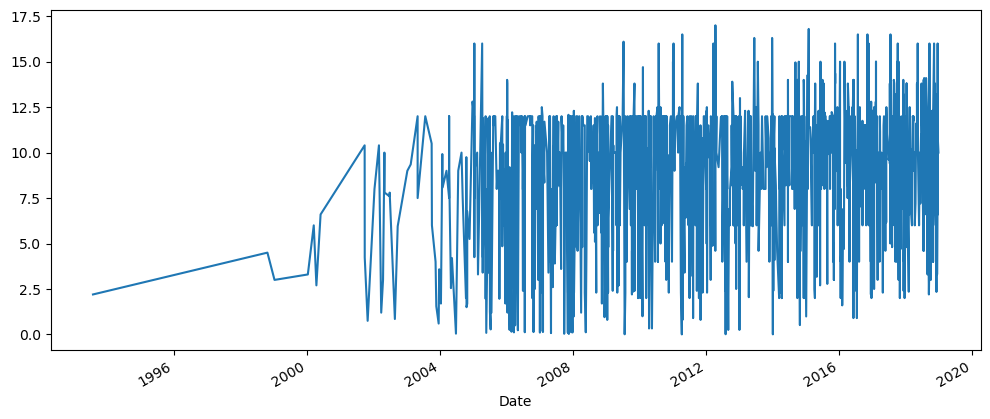

In [41]:
df['electrical_capacity'].plot(figsize=(12,5))

In [42]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['electrical_capacity'])

NameError: name 'adf_test' is not defined

In [33]:
#checking for seasonality for France wind
from statsmodels.tsa.seasonal import seasonal_decompose
result_fr_wind = seasonal_decompose(FR_new_wind)
fig = result.plot()

NameError: name 'result' is not defined

In [34]:
# running Auto Arima for France wind
from pmdarima.arima import auto_arima
arima_model = auto_arima(FR_new_wind,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for France wind
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series_1 = FR_new_wind
# split into train and test sets
X = series_1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("New Wind Capacity")
pyplot.show()

In [35]:
##bring in weekly time series of France hydro capacity from 2014-2018 with preview
import pandas as pd
FR_H_df = pd.read_csv('France_hydro.csv')
FR_H_df.head()
import matplotlib.pyplot as plt
import pmdarima
FR_H_df["Date"] = pd.to_datetime(FR_H_df["Date"])
FR_H_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'France_hydro.csv'

In [ ]:
#setting index
FR_H_df.set_index ('Date', inplace=True)
FR_new_hydro = FR_H_df.resample('w').sum() 

In [ ]:
#time series for France hydro
FR_new_hydro.plot()

In [ ]:
#checking for seasonality for France hydro
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(FR_new_hydro)
fig = result.plot()

In [ ]:
#Auto Arima for France hydro
from pmdarima.arima import auto_arima
arima_model = auto_arima(FR_new_hydro,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for France hydro
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
new_series = FR_new_hydro
# split into train and test sets
X = new_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("France Hydro Capacity")

pyplot.show()

In [ ]:
##bring in weekly time series of France solar capacity from 2014-2018 with preview
import pandas as pd
FR_S_df = pd.read_csv('France_Solar.csv')
FR_S_df.head()
import matplotlib.pyplot as plt
import pmdarima
FR_S_df["Date"] = pd.to_datetime(FR_S_df["Date"])
FR_S_df.head()

In [ ]:
#setting index
FR_S_df.set_index ('Date', inplace=True)
FR_new_solar = FR_S_df.resample('w').sum() 

In [ ]:
#plotting time series for France hydro
FR_new_solar.plot()

In [ ]:
#checking seasonality for France hydro
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(FR_new_solar)
fig = result.plot()

In [ ]:
#Auto Arima for France hydro
from pmdarima.arima import auto_arima
arima_model = auto_arima(FR_new_solar,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for France hydro
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series_2 = FR_new_solar
# split into train and test sets
X = series_2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("France Solar Capacity")
pyplot.show()

In [ ]:
##bring in weekly time series of France bio capacity from 2014-2018 with preview
import pandas as pd
FR_B_df = pd.read_csv('France_bio.csv')
FR_B_df.head()
import matplotlib.pyplot as plt
import pmdarima
FR_B_df["Date"] = pd.to_datetime(FR_B_df["Date"])
FR_B_df.head()

In [ ]:
#setting index
FR_B_df.set_index ('Date', inplace=True)
FR_new_bio = FR_B_df.resample('w').sum() 

In [ ]:
#time series for France bioenergy
FR_new_bio.plot()

In [ ]:
#checking for seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(FR_new_bio)
fig = result.plot()

In [ ]:
#Auto Arima for France bioenergy
from pmdarima.arima import auto_arima
arima_model = auto_arima(FR_new_bio,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for France bioenergy
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
bio_series = FR_new_bio
# split into train and test sets
X = bio_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("France Bioenergy Capacity")
pyplot.show()

In [ ]:
##bring in weekly time series of Switzerland wind capacity from 2014-2018 with preview
import pandas as pd
SW_W_df = pd.read_csv('SW_Wind.csv')
SW_W_df.head()
import matplotlib.pyplot as plt
import pmdarima
SW_W_df["Date"] = pd.to_datetime(SW_W_df["Date"])
SW_W_df.head()

In [ ]:
#setting index
SW_W_df.set_index ('Date', inplace=True)
SW_new_wind = SW_W_df.resample('w').sum() 

In [ ]:
#time series for Switzerland wind
SW_new_wind.plot()

In [ ]:
#checking for seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(SW_new_wind)
fig = result.plot()

In [ ]:
#Auto Arima for Switzerland wind
from pmdarima.arima import auto_arima
arima_model = auto_arima(SW_new_wind,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for Switzerland wind
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series_3 = SW_new_wind
# split into train and test sets
X = series_3.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("Switzerland Wind Capacity")
pyplot.show()

In [ ]:
##bring in weekly time series of Switzerland solar capacity from 2014-2018 with preview
import pandas as pd
SW_S_df = pd.read_csv('SW_solar.csv')
SW_S_df.head()
import matplotlib.pyplot as plt
import pmdarima
SW_S_df["Date"] = pd.to_datetime(SW_S_df["Date"])
SW_S_df.head()

In [ ]:
#setting index
SW_S_df.set_index ('Date', inplace=True)
SW_new_solar = SW_S_df.resample('w').sum() 

In [ ]:
#time series for Switzerland solar
SW_new_solar.plot()

In [ ]:
#checking for seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(SW_new_solar)
fig = result.plot()

In [ ]:
# Auto Arima for Switzerland solar
from pmdarima.arima import auto_arima
arima_model = auto_arima(SW_new_solar,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for Switzerland Solar
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series_4 = SW_new_solar
# split into train and test sets
X = series_4.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("Switzerland Solar Capacity")

pyplot.show()

In [ ]:
##bring in weekly time series of Switzerland hydro capacity from 2014-2018 with preview
import pandas as pd
SW_H_df = pd.read_csv('SW_hydro.csv')
SW_H_df.head()
import matplotlib.pyplot as plt
import pmdarima
SW_H_df["Date"] = pd.to_datetime(SW_H_df["Date"])
SW_H_df.head()

In [ ]:
#setting index
SW_H_df.set_index ('Date', inplace=True)
SW_new_hydro = SW_H_df.resample('w').sum() 

In [ ]:
#time serise for Switzerland hydro
SW_new_hydro.plot()

In [ ]:
#checking for seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(SW_new_hydro)
fig = result.plot()

In [ ]:
#Auto Arima for Switzerland hydro
from pmdarima.arima import auto_arima
arima_model = auto_arima(SW_new_hydro,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for Switzerland hydro
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series_5 = SW_new_hydro
# split into train and test sets
X = series_5.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("Switzerland Hydro Capacity")
pyplot.show()

In [ ]:
##bring in weekly time series of Switzerland bioenergy capacity from 2014-2018 with preview
import pandas as pd
SW_B_df = pd.read_csv('SW_bio.csv')
SW_B_df.head()
import matplotlib.pyplot as plt
import pmdarima
SW_B_df["Date"] = pd.to_datetime(SW_B_df["Date"])
SW_B_df.head()

In [ ]:
#setting index
SW_B_df.set_index ('Date', inplace=True)
SW_new_bio = SW_B_df.resample('w').sum() 

In [ ]:
#time series for Switzerland Bioenergy
SW_new_bio.plot()

In [ ]:
#checking for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(SW_new_bio)
fig = result.plot()

In [ ]:
#Auto Arima for Switzerland Bioenergy
from pmdarima.arima import auto_arima
arima_model = auto_arima(SW_new_bio,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace = True,
                        supress_warnings=True,stepwise = True,
                        random_state=20,n_fits = 50)

In [ ]:
# evaluate an ARIMA model using a walk-forward validation for Switzerland Bioenergy
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
sw_bio_series = SW_new_bio
# split into train and test sets
X = sw_bio_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.ylabel("MW Capacity")
plt.xlabel("Switzerland Bioenergy Capacity")
pyplot.show()